```
python ../../Mono2Multi_expt.py -p ../../Test_Projects/PetClinic/src/ --alpha 1 --n-clusters 2 10 --threshold 0.1 0.9 --n-exec 10 -o alpha1.json -e ICP NED IFN SM Precision SR -k 7
```

In [71]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import json
def heatmap(data, row_labels, col_labels, ax, cbarlabel="", **kwargs):
    im = ax.imshow(data, **kwargs)
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    plt.setp(ax.get_xticklabels(), rotation=0,rotation_mode="anchor")
    ax.spines[:].set_visible(False)
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar
def annotate_heatmap(im, valfmt="{x:.5f}", textcolors=("black", "white"), **textkw):
    data = im.get_array()
    threshold = im.norm(data.max())/2.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)
    return texts
def prepare_data(path, measure):
    with open(path, "rt") as f:
        data = json.load(f)
    values = [[]]
    c = data[0]["n_clusters"]
    l_clusters = [c]
    l_thresholds = []
    lt_done = False
    for i in data:
        if i["n_clusters"] != c:
            values.append([])
            c = i["n_clusters"]
            l_clusters.append(i["n_clusters"])
            lt_done = True
        if not lt_done:
            l_thresholds.append(i["threshold"])
        values[-1].append(i[measure])   
    values = np.array(values).T
    return values, l_thresholds, l_clusters

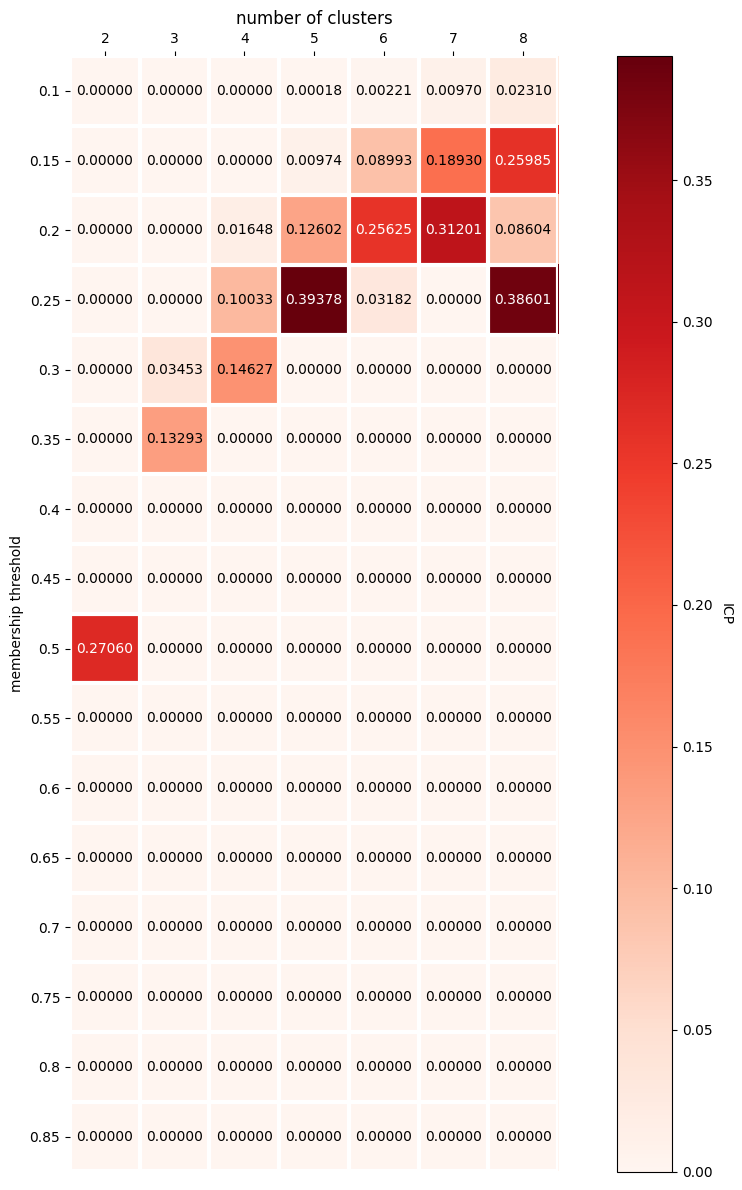

In [72]:
values, l_thresholds, l_clusters = prepare_data("Json_Files/jpetstore85.json", "ICP")
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,12)
im, cbar = heatmap(values, l_thresholds, l_clusters, ax=ax, cmap="Reds", cbarlabel="ICP")
texts = annotate_heatmap(im)
ax.set_title("number of clusters", loc="center")
ax.set_ylabel("membership threshold")
fig.tight_layout()
plt.show()

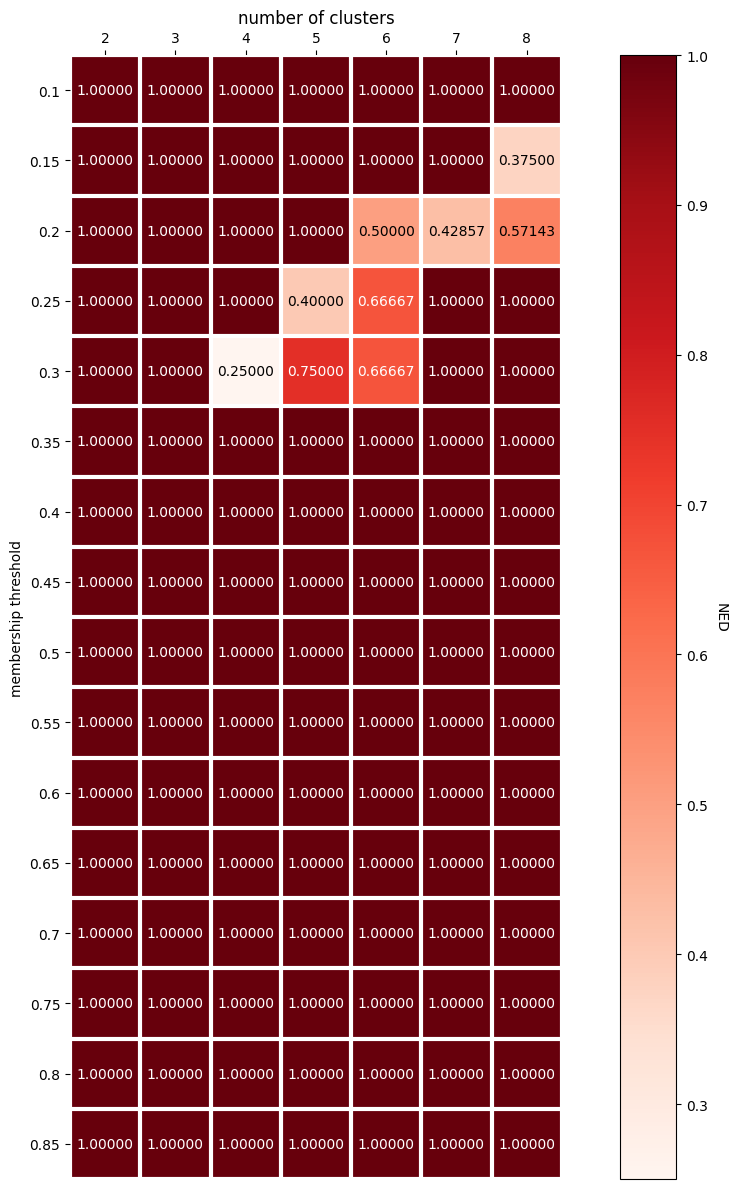

In [74]:

values, l_thresholds, l_clusters = prepare_data("Json_Files/jpetstore85.json", "NED")
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,12)
im, cbar = heatmap(values, l_thresholds, l_clusters, ax=ax, cmap="Reds", cbarlabel="NED")
texts = annotate_heatmap(im)
ax.set_title("number of clusters", loc="center")
ax.set_ylabel("membership threshold")
fig.tight_layout()
plt.show()

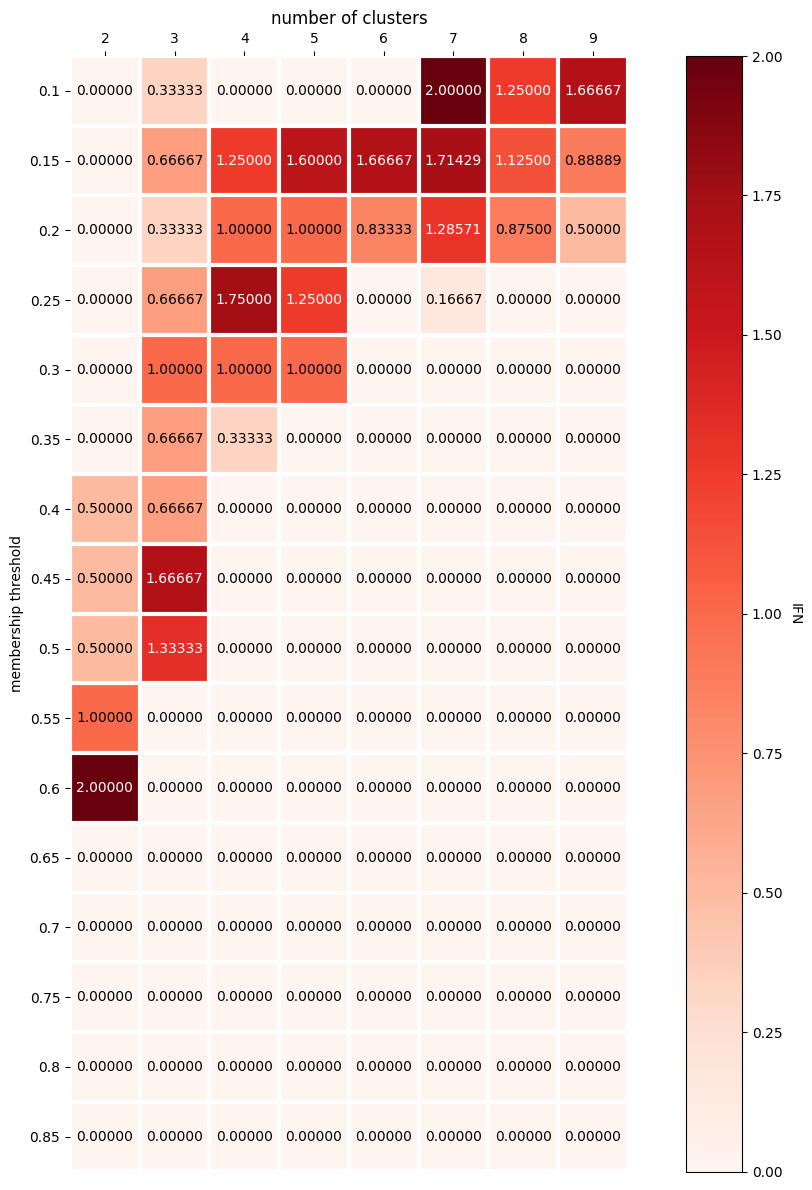

In [68]:
values, l_thresholds, l_clusters = prepare_data("Json_Files/petclinicold8531.json", "IFN")
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,12)
im, cbar = heatmap(values, l_thresholds, l_clusters, ax=ax, cmap="Reds", cbarlabel="IFN")
texts = annotate_heatmap(im)
ax.set_title("number of clusters", loc="center")
ax.set_ylabel("membership threshold")
fig.tight_layout()
plt.show()

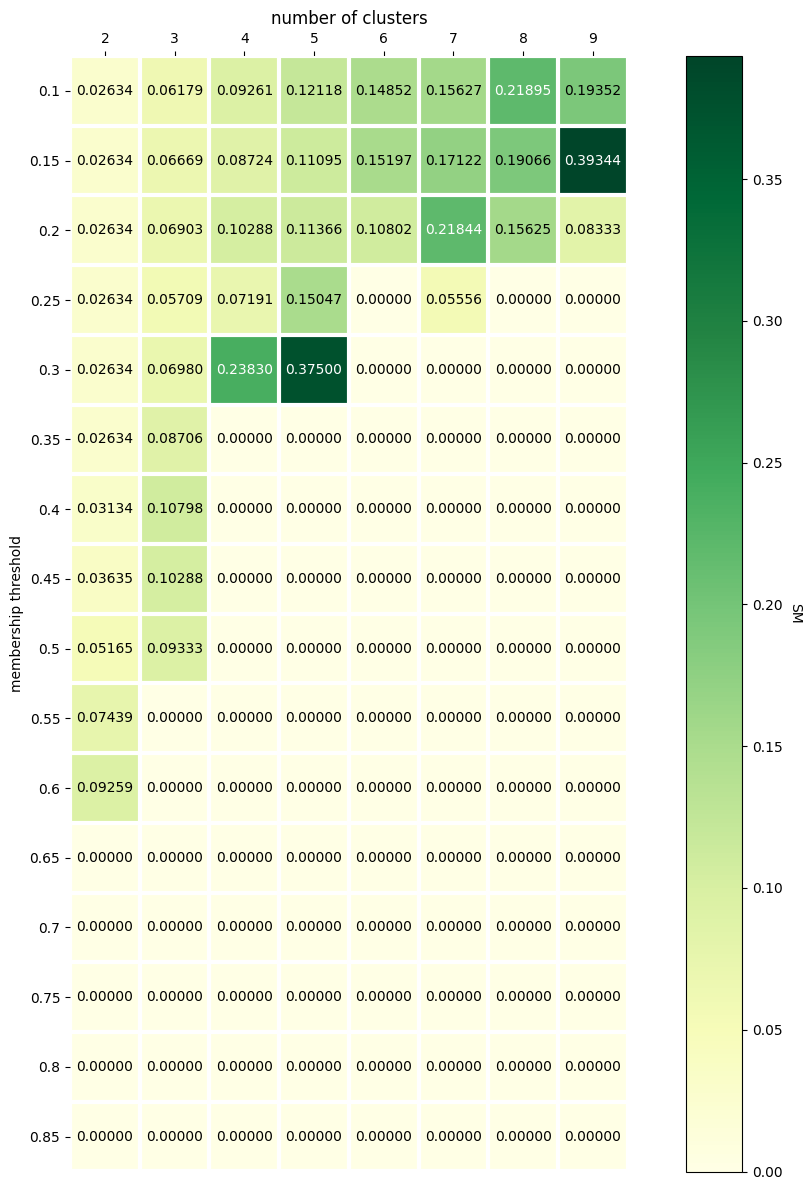

In [69]:
values, l_thresholds, l_clusters = prepare_data("Json_Files/petclinicold8531.json", "SM")
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,12)
im, cbar = heatmap(values, l_thresholds, l_clusters, ax=ax, cmap="YlGn", cbarlabel="SM")
texts = annotate_heatmap(im)
ax.set_title("number of clusters", loc="center")
ax.set_ylabel("membership threshold")
fig.tight_layout()
plt.show()

In [70]:
values, l_thresholds, l_clusters = prepare_data("Json_Files/petclinicold8531.json", "Precision")
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,12)
im, cbar = heatmap(values, l_thresholds, l_clusters, ax=ax, cmap="YlGn", cbarlabel="Precision")
texts = annotate_heatmap(im)
ax.set_title("number of clusters", loc="center")
ax.set_ylabel("membership threshold")
fig.tight_layout()
plt.show()

KeyError: 'Precision'

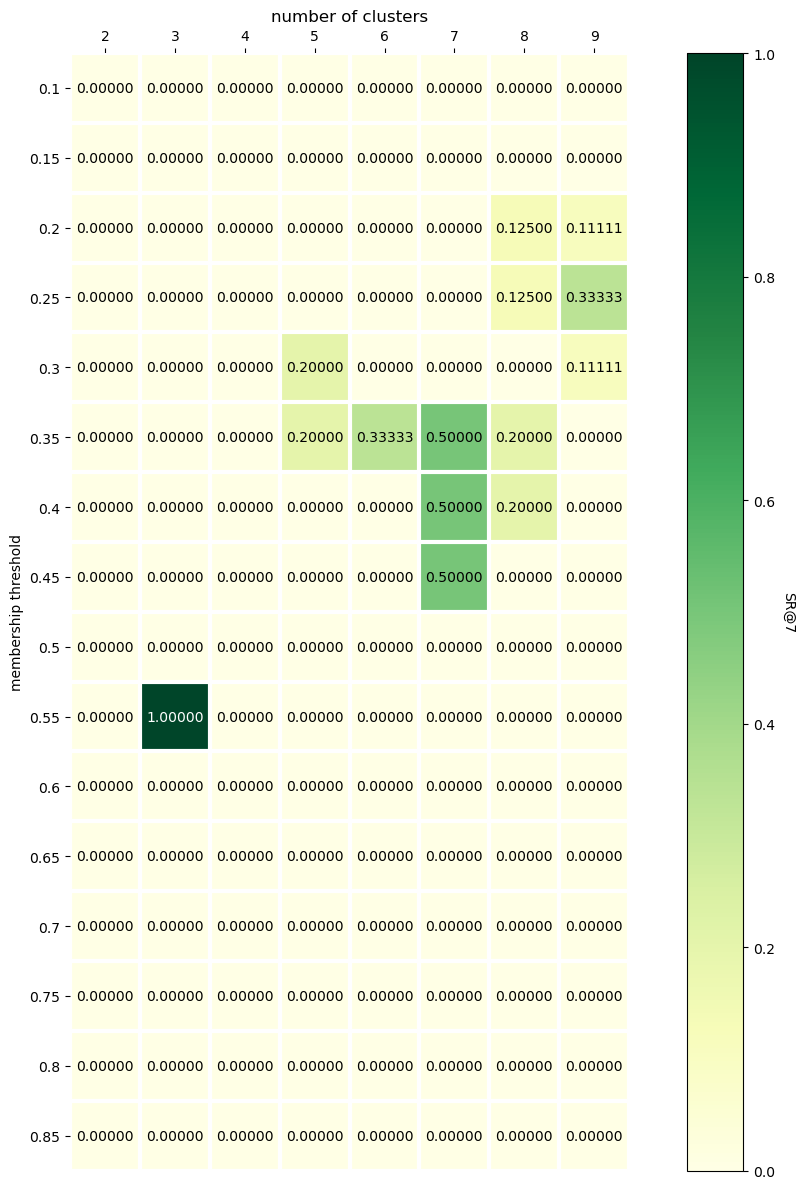

In [75]:
values, l_thresholds, l_clusters = prepare_data("Json_Files/alpha1.json", "SR@7")
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,12)
im, cbar = heatmap(values, l_thresholds, l_clusters, ax=ax, cmap="YlGn", cbarlabel="SR@7")
texts = annotate_heatmap(im)
ax.set_title("number of clusters", loc="center")
ax.set_ylabel("membership threshold")
fig.tight_layout()
plt.show()